In [45]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,6)

In [46]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [47]:
import util
from scripts.experiments.all_single_features import get_all_column_names, get_all_feature_names

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]
nb_runs = 16

all_column_names = get_all_column_names(cfg, drop_variance=True)
experiments = get_all_feature_names(all_column_names)

#resall_single_features_sf=(\w|\d)*dvs2aTrckMode(\w|\d)*

# get filenames
stats_path = io.get_multiple_pipeline_statistics_path(ad)

statistics_dfs = {}
noise_statistics_dfs = {}
#for e in experiments:
#    fn = "grid_search_statistics_B{}_{}{}.csv".format(io.beam, ad, e)
#    statistics_dfs[e] = io.read_csv(fn, stats_path)

filenames=["grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*{}(\w|\d)*.csv".format(i) for i in experiments]
noise_filenames= ['grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*{}(\w|\d)*.csv'.format(i) for i in experiments]
filename_all_features = 'grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-test.csv'

for i, fn in enumerate(filenames):
    statistics_dfs[experiments[i]] = io.read_csv(fn, stats_path)
    noise_statistics_dfs[experiments[i]] = io.read_csv(noise_filenames[i], stats_path)
all_features_df = io.read_csv(filename_all_features, stats_path)

Started process of loading data
Loading feature vectors
Using data from beam 2
Reading input features from /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../data-cern/ml-data/preprocessed/lbds/2016/
Reading random_noise.csv file
First and last timestamp of input data: 2016-03-23 20:14:39 2016-12-05 05:02:04

Filtering data on beam 2, columns: 1191
Filtered data on beam 2, filtered 0 columns, remaining columns: 1191
The column timestamps is not present in dataframe random_noise.csv
Succesfully loaded features with dimensions (2162, 1191)
Starting variance filtering...
Starting variance preprocessing of feature vectors
Columns before variance filter: 1191
Filtering columns with variance <= 0.25, keeping 30 columns through the filter
Dropped 0 columns with variance <= 0.25
Remaining columns: 1191
Variance preprocessing done in 0.16 seconds
Done with variance filtering
Working with "timestamp_based" segmentation type... No segmentation necessary, 

Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*energyReference(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*energyReference(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*dvs2aTrckMode(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*dvs2aTrckMode(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*dvs2aTrckNom(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*dvs2aTrckNom(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_feat

Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*humidityAmbientUA(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*overshoot2Current(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*overshoot2Current(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*tempUpstreamRA(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-randomall_single_features_sf=(\w|\d)*tempUpstreamRA(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_resall_single_features_sf=(\w|\d)*wholeBeamIntensity(\w|\d)*.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_r

76
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
76
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
76
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/


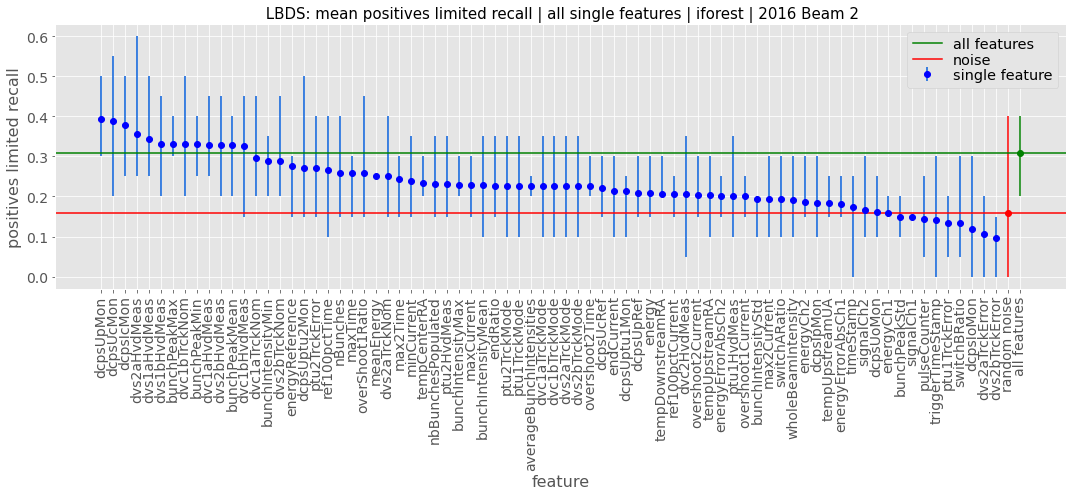

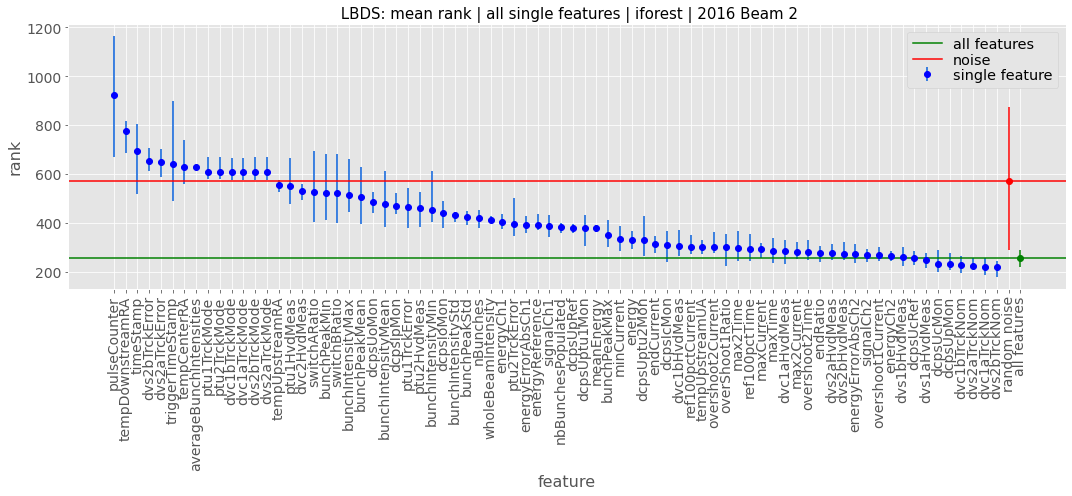

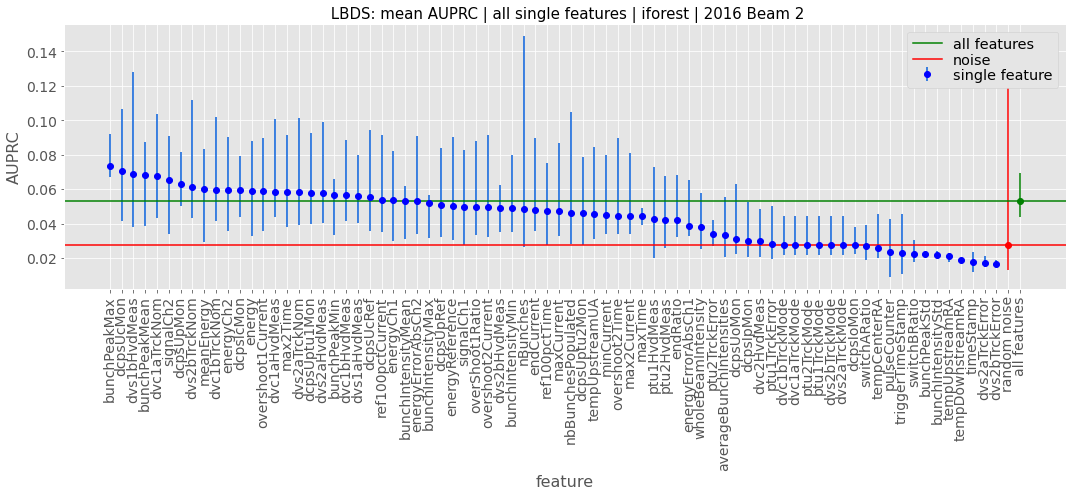

In [48]:
from plot.gs_statistics import plot_multi_pipeline_run_stats

dfs_to_plot = ['practical_recall', 'rank', 'auc']
save_figures = True

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]

plot_data = {type: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for type in dfs_to_plot}
# means
for type in dfs_to_plot:
    for experiment_name, stats_df in statistics_dfs.items():
        plot_data[type]['x'].append(experiment_name)
        plot_data[type]['y'].append(stats_df[type].mean())
        plot_data[type]['err_min'].append(stats_df[type].mean() - stats_df[type].min())
        plot_data[type]['err_max'].append(stats_df[type].max() - stats_df[type].mean())
    plot_data[type] = pd.DataFrame(plot_data[type])
    

plot_data_random = {type: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for type in dfs_to_plot}
# means
for type in dfs_to_plot:
    for experiment_name, stats_df in noise_statistics_dfs.items():
        plot_data_random[type]['x'].append(experiment_name)
        plot_data_random[type]['y'].append(stats_df[type].mean())
        plot_data_random[type]['err_min'].append(stats_df[type].mean() - stats_df[type].min())
        plot_data_random[type]['err_max'].append(stats_df[type].max() - stats_df[type].mean())
    plot_data_random[type] = pd.DataFrame(plot_data_random[type])

plot_data_all = {type: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for type in dfs_to_plot}
# means
for type in dfs_to_plot:
    plot_data_all[type]['x'].append('all features')
    plot_data_all[type]['y'].append(all_features_df[type].mean())
    plot_data_all[type]['err_min'].append(all_features_df[type].mean() - all_features_df[type].min())
    plot_data_all[type]['err_max'].append(all_features_df[type].max() - all_features_df[type].mean())
    plot_data_all[type] = pd.DataFrame(plot_data_all[type])
   

# noise gemiddelde

plot_noise_mean = {type: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for type in dfs_to_plot}
# means
for type in dfs_to_plot:
    plot_noise_mean[type]['x'].append('random noise')
    plot_noise_mean[type]['y'].append(plot_data_random[type]['y'].mean())
    maximal_reds = plot_data_random[type]['y'] + plot_data_random[type]['err_max']
    minimal_reds = plot_data_random[type]['y'] - plot_data_random[type]['err_min']
    plot_noise_mean[type]['err_min'].append(plot_data_random[type]['y'].mean() - minimal_reds.min())
    plot_noise_mean[type]['err_max'].append(maximal_reds.max() - plot_data_random[type]['y'].mean())
    plot_noise_mean[type] = pd.DataFrame(plot_noise_mean[type])

# remove failed pipelines
features_that_failed = ['effectiveToleranceCh1', 
                        'effectiveToleranceCh2',
                       'dvc1bTrckError',
                       'dvc1aTrckError',
                       'humidityAmbientUA',
                       'filledBuckets',
                       'dcpsUoRef',
                       'dcpsIcRef',
                       'dcpsUptu1Ref',
                       'dcpsUptu2Ref']
for type in dfs_to_plot:
    for f in features_that_failed:
        plot_data[type] = plot_data[type][plot_data[type]['x'] != f]
        plot_data_random[type] = plot_data_random[type][plot_data_random[type]['x'] != f]

# plot statistics
threshold = cfg["pipeline"]["anomaly_detection"][ad]["threshold"]

#plot
colors = ['bo', 'ro', 'go']
e_colors = ["#045EDB", 'red', 'green']

# seperate plots

for i, type in enumerate(dfs_to_plot):
    d = plot_data[type]
    d_random = plot_noise_mean[type]
    d_all = plot_data_all[type]
    d = d.sort_values(by=['y'], ascending=False)
    
    plt.figure(figsize=(15, 7), facecolor='white', edgecolor='white')
    print(len(d['x']))
    plt.errorbar(d['x'], d['y'], yerr=[d['err_min'], d['err_max']],
                 ecolor=e_colors[0],
                 fmt=colors[0])
    plt.errorbar(d_random['x'], d_random['y'], yerr=[d_random['err_min'], d_random['err_max']],
                 ecolor=e_colors[1],
                 fmt=colors[1])
    plt.errorbar(d_all['x'], d_all['y'], yerr=[d_all['err_min'], d_all['err_max']],
                 ecolor=e_colors[2],
                 fmt=colors[2])
    plt.axhline(y = d_all['y'][0], color = 'g', linestyle = '-')
    plt.axhline(y = d_random['y'][0], color = 'r', linestyle = '-')
    if type == "practical_recall":
        type = 'positives limited recall'
    elif type == "auc":
        type = 'AUPRC'
    plt.title(
        " {}: mean {} | all single features | {} | {} Beam {}".format(machine, type, ad, io.start_year, io.beam),
        fontsize=15)
    plt.xlabel("feature")
    plt.xticks(rotation='vertical')
    plt.ylabel(type)
    plt.legend(['all features', 'noise', 'single feature'])
    plt.tight_layout()
    if save_figures:
        prefix = "{}_{} single features errbars".format(machine, type)
        filename = '{}_{}.png'.format(prefix, ad)
        fig_path = io.get_figures_path(ad)
        io.save_figure(plt, fig_path, filename)
plt.show()
